<a href="https://colab.research.google.com/github/Davron030901/Scikit_learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://raw.githubusercontent.com/Davron030901/Scikit_learning/main/data/gym_members_exercise_tracking.csv

--2024-12-24 08:33:07--  https://raw.githubusercontent.com/Davron030901/Scikit_learning/main/data/gym_members_exercise_tracking.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65136 (64K) [text/plain]
Saving to: ‘gym_members_exercise_tracking.csv.5’

gym_members_exercis 100%[===================>]  63.61K  --.-KB/s    in 0.01s   

2024-12-24 08:33:08 (4.21 MB/s) - ‘gym_members_exercise_tracking.csv.5’ saved [65136/65136]



In [ ]:
df=pd.read_csv("/content/gym_members_exercise_tracking.csv")

In [ ]:
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [ ]:
df

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                        1.69           1313.0         Yoga            12.6   
1                        1.30            883.0         HIIT            33.9   
2                        1.11            677.0       Cardio            33.4   
3                        0.59            532.0     Strength            28.8   
4                        0.64            556.0     Strength            29.2   
..                        ...              ...          ...             ...   
968                      1.57           1364.0     Strength            10.0   
969                      1.38           1260.0     Strength            25.0   
970                      1.72            929.0       Cardio            18.8   
971                      1.10            883.0         HIIT            28.2   
972                      0.75            542.0     Strength            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI  
0    30.20  
1    32.00  
2    24.71  
3    18.41  
4    14.39  
..     ...  
968  28.77  
969  25.69  
970  19.50  
971  37.74  
972  33.38  

[973 rows x 15 columns]

In [ ]:
df.Gender.value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

In [ ]:
df.Workout_Type.value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
ole=OrdinalEncoder(categories=[['Male','Female'],['Cardio','Yoga','Strength','HIIT']],dtype=np.int8)

In [ ]:
ct = ColumnTransformer([('ole', ole, ["Gender", "Workout_Type"])], remainder='passthrough')
transformed = ct.fit_transform(df)

# Convert back to DataFrame (manually handle column names)
transformed_df = pd.DataFrame(transformed, columns=["Gender", "Workout_Type"] + df.columns.difference(["Gender", "Workout_Type"]).tolist())

In [ ]:
df=transformed_df
df

Gender  Workout_Type   Age  Avg_BPM   BMI  Calories_Burned  \
0       0.0           1.0  56.0     88.3  1.71            180.0   
1       1.0           3.0  46.0     74.9  1.53            179.0   
2       1.0           0.0  32.0     68.1  1.66            167.0   
3       0.0           2.0  25.0     53.2  1.70            190.0   
4       0.0           2.0  38.0     46.1  1.79            188.0   
..      ...           ...   ...      ...   ...              ...   
968     0.0           2.0  24.0     87.1  1.74            187.0   
969     0.0           2.0  25.0     66.6  1.61            184.0   
970     1.0           0.0  59.0     60.4  1.76            194.0   
971     0.0           3.0  32.0    126.4  1.83            198.0   
972     0.0           2.0  46.0     88.7  1.63            166.0   

     Experience_Level  Fat_Percentage  Height (m)  Max_BPM  Resting_BPM  \
0               157.0            60.0        1.69   1313.0         12.6   
1               151.0            66.0        1.30    883.0         33.9   
2               122.0            54.0        1.11    677.0         33.4   
3               164.0            56.0        0.59    532.0         28.8   
4               158.0            68.0        0.64    556.0         29.2   
..                ...             ...         ...      ...          ...   
968             158.0            67.0        1.57   1364.0         10.0   
969             166.0            56.0        1.38   1260.0         25.0   
970             120.0            53.0        1.72    929.0         18.8   
971             146.0            62.0        1.10    883.0         28.2   
972             146.0            66.0        0.75    542.0         28.8   

     Session_Duration (hours)  Water_Intake (liters)  Weight (kg)  \
0                         3.5                    4.0          3.0   
1                         2.1                    4.0          2.0   
2                         2.3                    4.0          2.0   
3                         2.1                    3.0          1.0   
4                         2.8                    3.0          1.0   
..                        ...                    ...          ...   
968                       3.5                    4.0          3.0   
969                       3.0                    2.0          1.0   
970                       2.7                    5.0          3.0   
971                       2.1                    3.0          2.0   
972                       3.5                    2.0          1.0   

     Workout_Frequency (days/week)  
0                            30.20  
1                            32.00  
2                            24.71  
3                            18.41  
4                            14.39  
..                             ...  
968                          28.77  
969                          25.69  
970                          19.50  
971                          37.74  
972                          33.38  

[973 rows x 15 columns]

<Axes: >

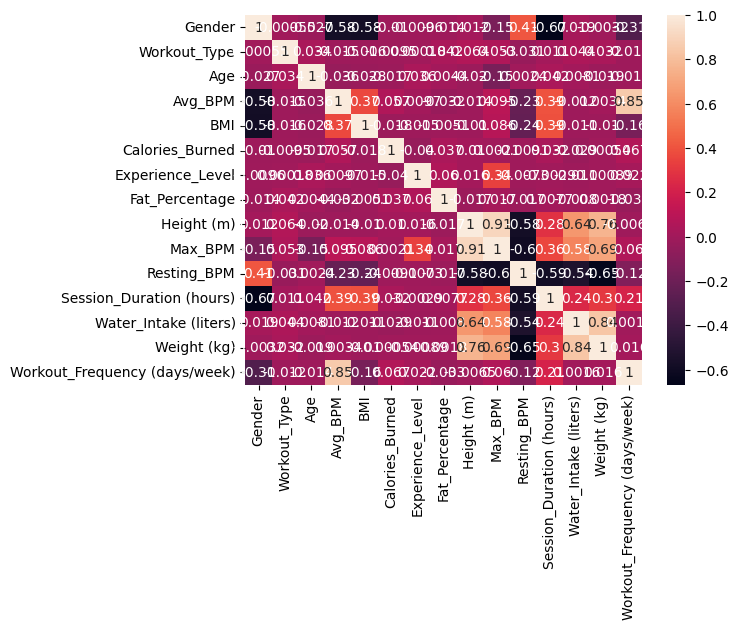

In [ ]:
sns.heatmap(df.corr(),annot=True)

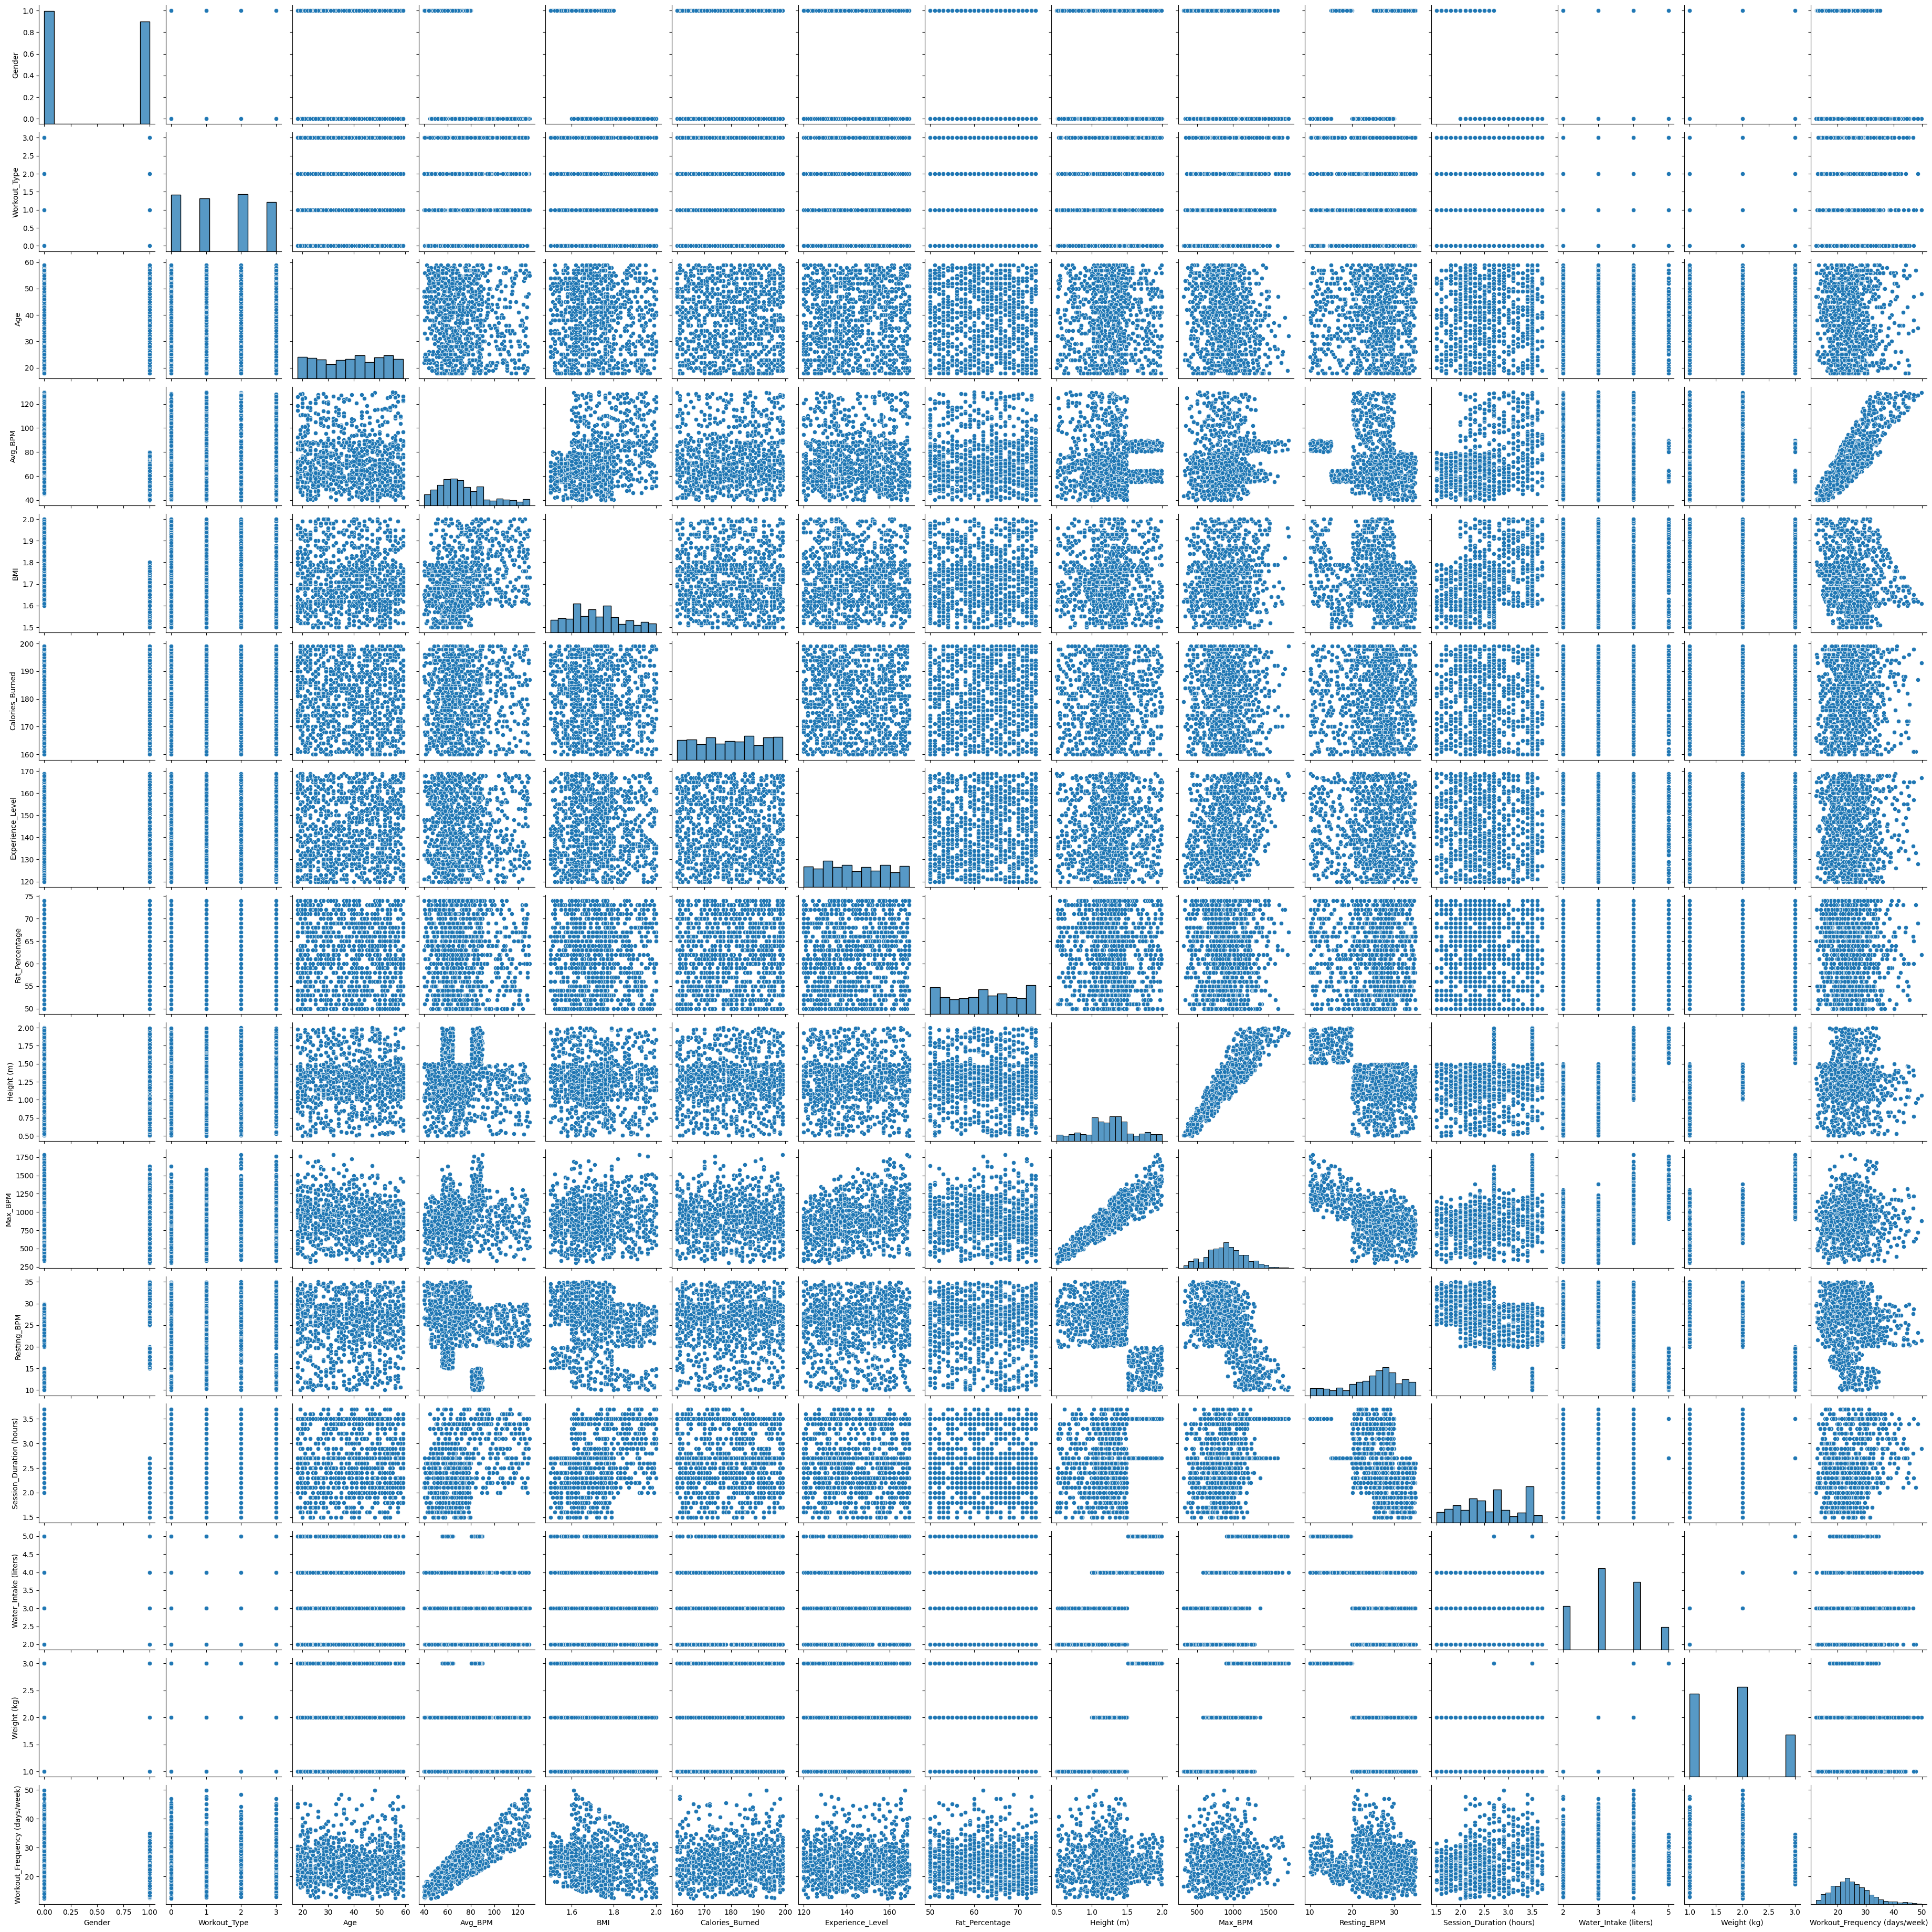

In [ ]:
sns.pairplot(df)

<Axes: ylabel='Count'>

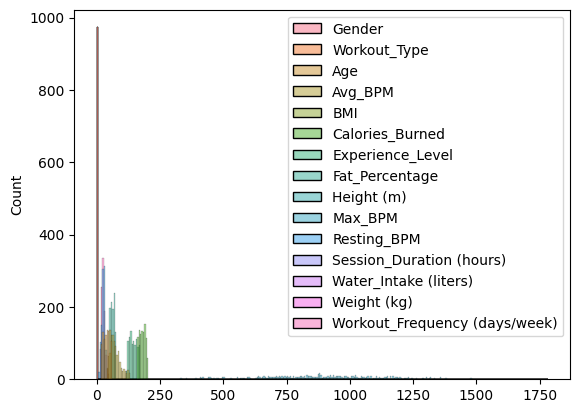

In [ ]:
sns.histplot(df)

In [ ]:
df.columns

Index(['Gender', 'Workout_Type', 'Age', 'Avg_BPM', 'BMI', 'Calories_Burned',
       'Experience_Level', 'Fat_Percentage', 'Height (m)', 'Max_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Water_Intake (liters)',
       'Weight (kg)', 'Workout_Frequency (days/week)'],
      dtype='object')

In [ ]:
df=df.drop(['Avg_BPM', 'BMI','Max_BPM','Resting_BPM'],axis=1)

In [ ]:
X=df.drop("Workout_Type",axis=1)
y=df.Workout_Type

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
knn=KNeighborsClassifier(n_neighbors=20, algorithm='ball_tree')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.21      0.29      0.25        24
         1.0       0.34      0.34      0.34        29
         2.0       0.21      0.25      0.23        24
         3.0       0.25      0.10      0.14        21

    accuracy                           0.26        98
   macro avg       0.26      0.25      0.24        98
weighted avg       0.26      0.26      0.25        98



In [ ]:
print(accuracy_score(y_test,y_pred))

0.25510204081632654


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.37      0.42      0.39        24
         1.0       0.27      0.31      0.29        29
         2.0       0.11      0.08      0.10        24
         3.0       0.30      0.29      0.29        21

    accuracy                           0.28        98
   macro avg       0.26      0.27      0.27        98
weighted avg       0.26      0.28      0.27        98



In [ ]:
print(accuracy_score(y_test,y_pred))
#

0.2755102040816326


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.29      0.38      0.33        24
         1.0       0.28      0.24      0.26        29
         2.0       0.17      0.17      0.17        24
         3.0       0.33      0.29      0.31        21

    accuracy                           0.27        98
   macro avg       0.27      0.27      0.27        98
weighted avg       0.27      0.27      0.26        98



In [ ]:
print(accuracy_score(y_test,y_pred))


0.2653061224489796


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)


In [ ]:
!wget https://raw.githubusercontent.com/Davron030901/Scikit_learning/main/data/Sales.csv

--2024-12-24 08:34:32--  https://raw.githubusercontent.com/Davron030901/Scikit_learning/main/data/Sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15240282 (15M) [text/plain]
Saving to: ‘Sales.csv.2’

Sales.csv.2         100%[===================>]  14.53M  --.-KB/s    in 0.1s    

2024-12-24 08:34:33 (136 MB/s) - ‘Sales.csv.2’ saved [15240282/15240282]



In [ ]:
df=pd.read_csv('Sales.csv')

In [ ]:
df.head()

Date  Day     Month  Year  Customer_Age       Age_Group  \
0  26/11/2013   26  November  2013            19     Youth (<25)   
1  26/11/2015   26  November  2015            19     Youth (<25)   
2  23/03/2014   23     March  2014            49  Adults (35-64)   
3  23/03/2016   23     March  2016            49  Adults (35-64)   
4  15/05/2014   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike               8         45         120     590   360   
1  Hitch Rack - 4-Bike               8         45         120     590   360   
2  Hitch Rack - 4-Bike              23         45         120    1366  1035   
3  Hitch Rack - 4-Bike              20         45         120    1188   900   
4  Hitch Rack - 4-Bike               4         45         120     238   180   

   Revenue  
0      950  
1      950  
2     2401  
3     2088  
4      418

In [ ]:
df = df.drop(columns=['Date', 'Age_Group','Product','Cost','Revenue'])

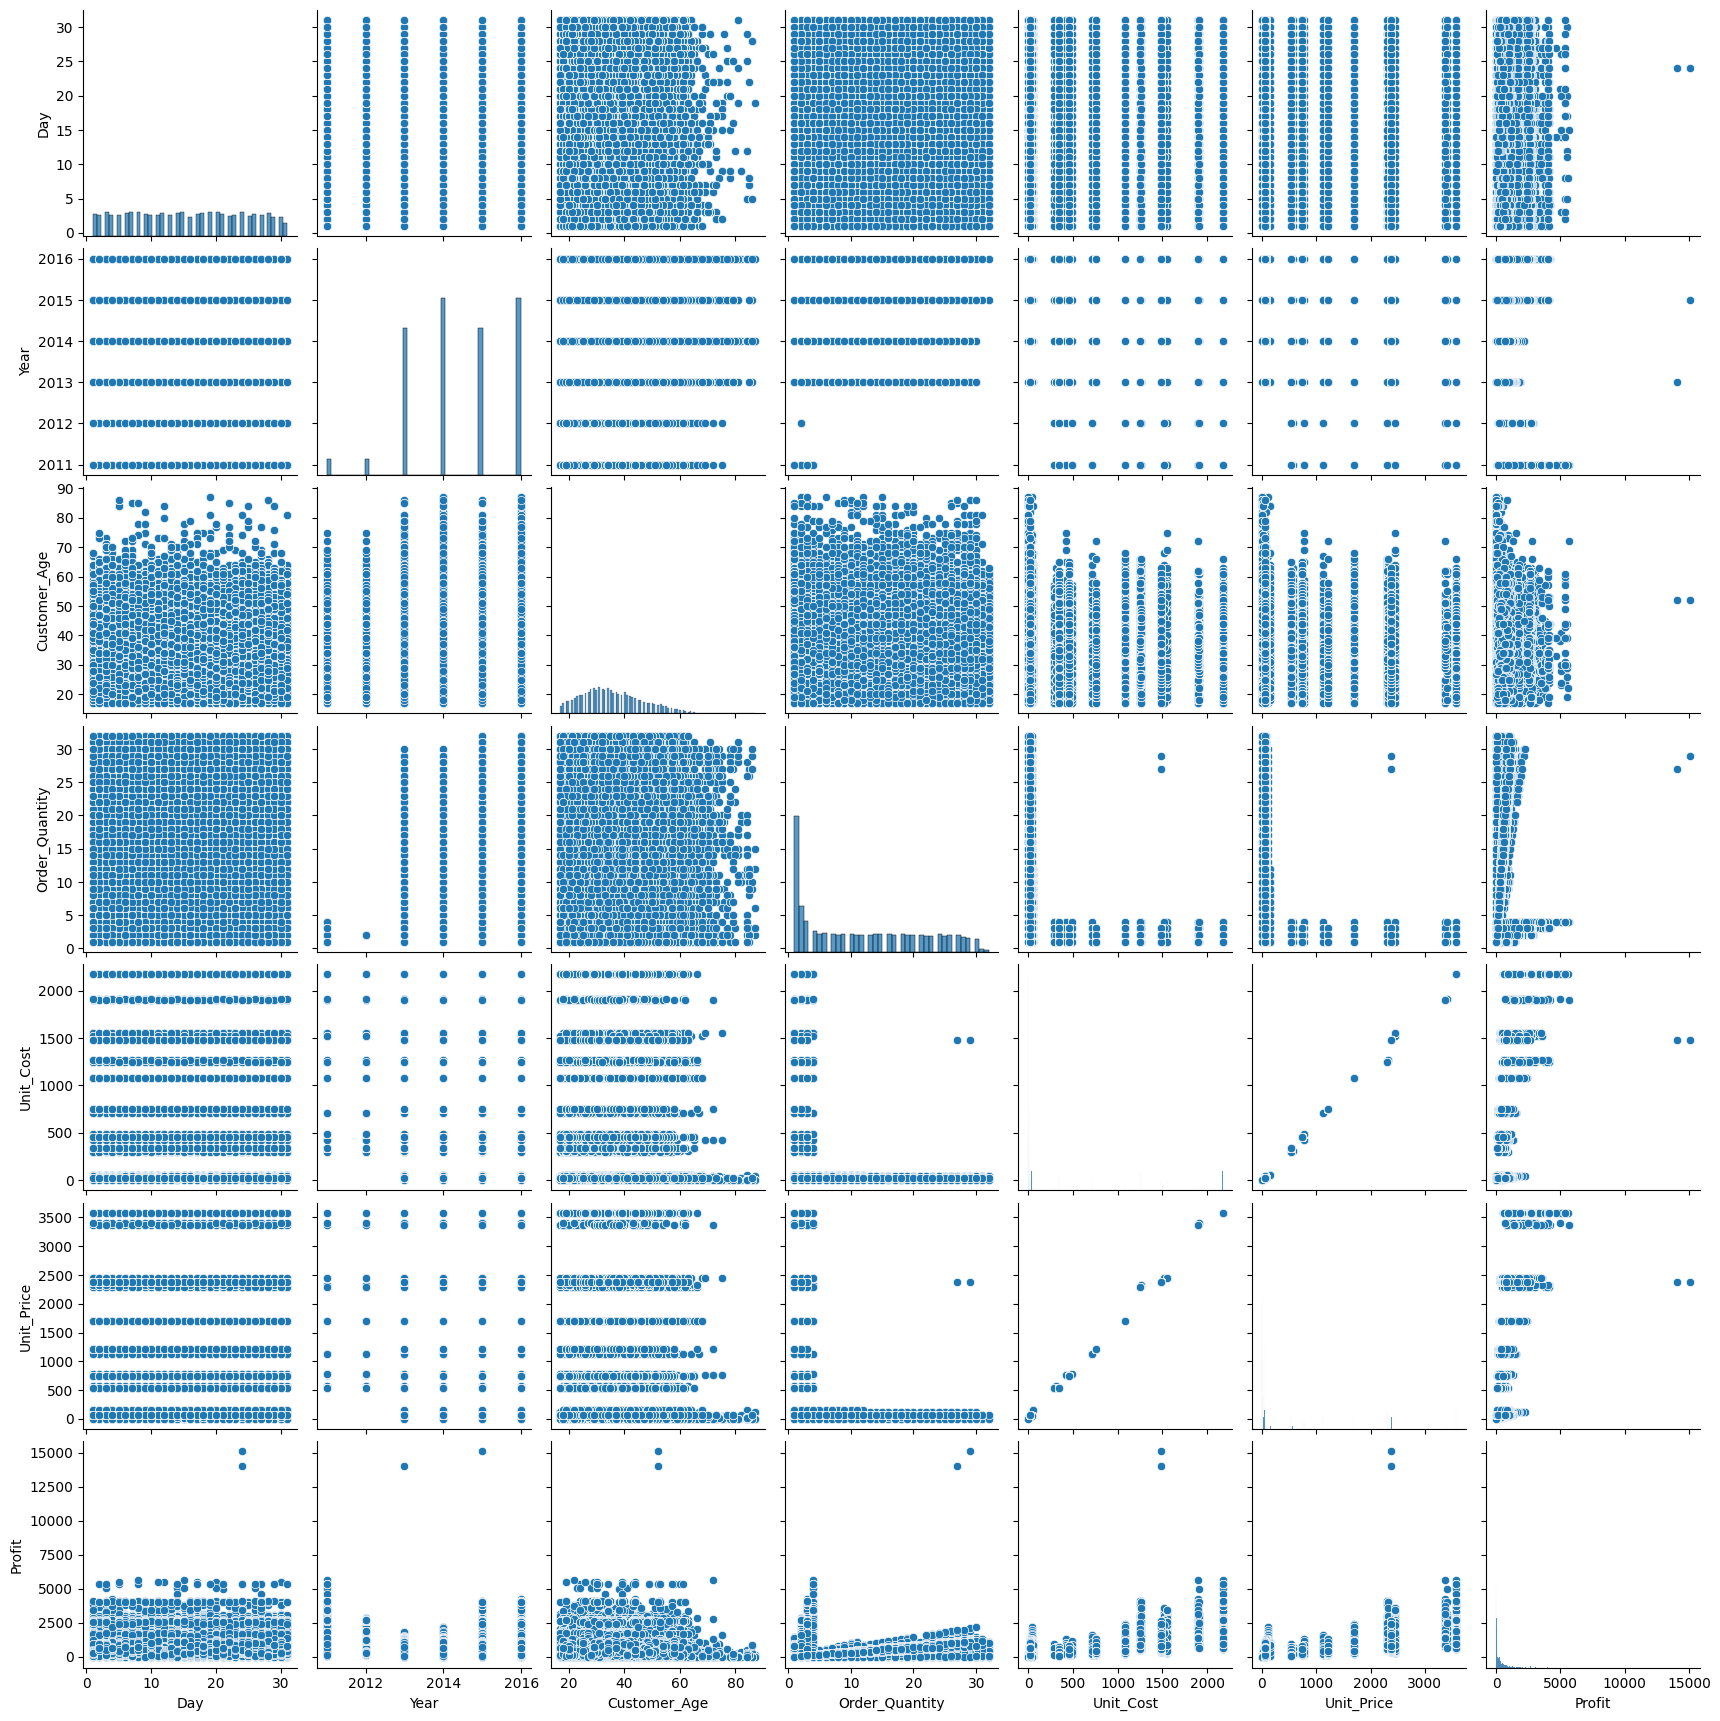

In [ ]:
sns.pairplot(df)

In [ ]:
df.isnull().sum()

Day                 0
Month               0
Year                0
Customer_Age        0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True,ignore_index=True)

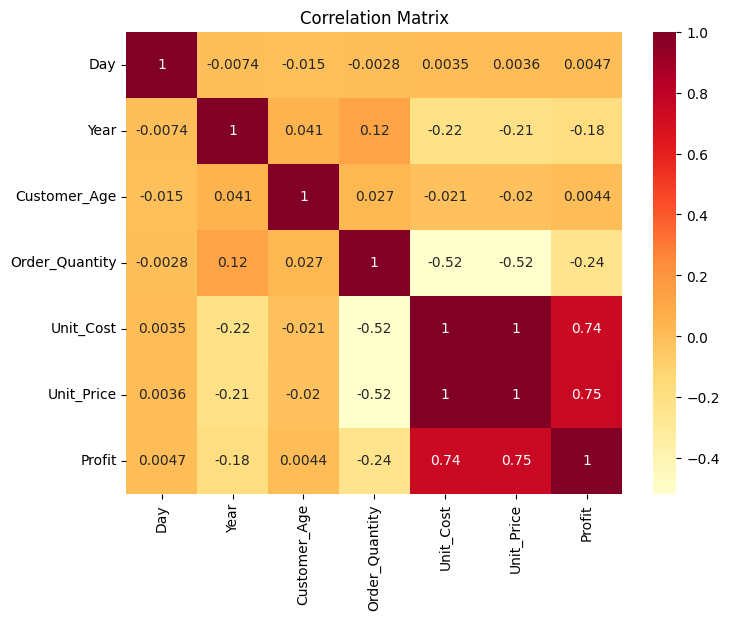

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

# Calculate the correlation matrix and create the heatmap
corr_matrix = df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
ode = OrdinalEncoder(dtype=np.int8)
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False,dtype=np.int8)

In [ ]:
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (ohe, ['Country', 'State', 'Product_Category']),
    (ode, ['Month','Customer_Gender', 'Sub_Category']),
    remainder='passthrough'
)

ct = ct.set_output(transform='pandas')

df = ct.fit_transform(df)

In [ ]:
df.columns

Index(['onehotencoder__Country_Australia', 'onehotencoder__Country_Canada',
       'onehotencoder__Country_France', 'onehotencoder__Country_Germany',
       'onehotencoder__Country_United Kingdom',
       'onehotencoder__Country_United States', 'onehotencoder__State_Alabama',
       'onehotencoder__State_Alberta', 'onehotencoder__State_Arizona',
       'onehotencoder__State_Bayern', 'onehotencoder__State_Brandenburg',
       'onehotencoder__State_British Columbia',
       'onehotencoder__State_California',
       'onehotencoder__State_Charente-Maritime',
       'onehotencoder__State_England', 'onehotencoder__State_Essonne',
       'onehotencoder__State_Florida', 'onehotencoder__State_Garonne (Haute)',
       'onehotencoder__State_Georgia', 'onehotencoder__State_Hamburg',
       'onehotencoder__State_Hauts de Seine', 'onehotencoder__State_Hessen',
       'onehotencoder__State_Illinois', 'onehotencoder__State_Kentucky',
       'onehotencoder__State_Loir et Cher', 'onehotencoder__State_Lo

In [ ]:
X = df.drop(columns='ordinalencoder__Sub_Category',axis=1)
y = df['ordinalencoder__Sub_Category']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(penalty='l2', C=1.0,solver='lbfgs', max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred=lr.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.54      0.62       125
           1       0.75      0.55      0.64       100
           2       0.41      0.01      0.01      3166
           3       0.91      0.98      0.94       860
           4       0.00      0.00      0.00       342
           5       0.00      0.00      0.00       780
           6       0.91      0.97      0.94       543
           7       0.72      0.92      0.81      2484
           8       0.90      0.51      0.65       267
           9       0.97      1.00      0.99      1213
          10       1.00      1.00      1.00      1786
          11       0.80      0.98      0.88      2636
          12       0.74      0.88      0.81       377
          13       1.00      0.58      0.73       228
          14       0.57      0.89      0.70      6644
          15       0.38      0.04      0.07       691
          16       0.64      0.25      0.36       166

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(accuracy_score(y_test,y_pred))

0.7135398072117101


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       125
           1       1.00      0.99      0.99       100
           2       0.61      0.63      0.62      3166
           3       1.00      1.00      1.00       860
           4       0.55      0.28      0.37       342
           5       0.50      0.74      0.60       780
           6       0.47      0.38      0.42       543
           7       0.80      0.94      0.87      2484
           8       0.97      0.95      0.96       267
           9       1.00      1.00      1.00      1213
          10       1.00      1.00      1.00      1786
          11       1.00      1.00      1.00      2636
          12       0.84      0.93      0.88       377
          13       0.55      0.14      0.22       228
          14       0.76      0.71      0.73      6644
          15       1.00      1.00      1.00       691
          16       0.70      0.54      0.61       166

    accuracy              

In [ ]:
print(accuracy_score(y_test,y_pred))

0.8054712602641914


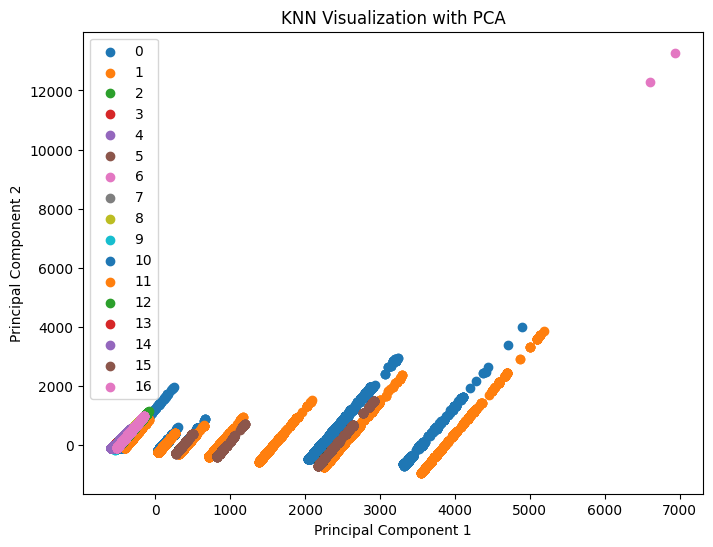

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X and y are defined from your previous code (e.g., from the gym dataset)
# If not, replace these with your actual X and y data
# X = ...
# y = ...

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data points, colored by their class labels
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KNN Visualization with PCA")
plt.legend()
plt.show()
